In [1]:
# Importando os pacotes necessários

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import plotly.io as pio
import plotly.graph_objects as go

## Análise de Correspondência Múltipla (MCA)

In [2]:
# Importando o banco de dados

perfil_mca = pd.read_excel("data/perfil_aplicacao_civil.xlsx")

In [3]:
# Selecionando apenas as variáveis que farão parte da análise

dados_mca = perfil_mca.drop(columns=['estudante'])

In [4]:
# Informações descritivas sobre as variáveis

for col in ['perfil', 'aplicacao', 'estado.civil']:
    print(dados_mca[col].value_counts(), '\n')

perfil
Agressivo      58
Moderado       25
Conservador    17
Name: count, dtype: int64 

aplicacao
Acoes       45
CDB         40
Poupanca    15
Name: count, dtype: int64 

estado.civil
Solteiro    57
Casado      43
Name: count, dtype: int64 



In [9]:
# Analisando as tabelas de contingência

tabela_mca_1 = pd.crosstab(dados_mca["perfil"], dados_mca["aplicacao"])
tabela_mca_2 = pd.crosstab(dados_mca["perfil"], dados_mca["estado.civil"])
tabela_mca_3 = pd.crosstab(dados_mca["aplicacao"], dados_mca["estado.civil"])

print(tabela_mca_1, '\n')
print(tabela_mca_2, '\n')
print(tabela_mca_3, '\n')

aplicacao    Acoes  CDB  Poupanca
perfil                           
Agressivo       36   20         2
Conservador      5    4         8
Moderado         4   16         5 

estado.civil  Casado  Solteiro
perfil                        
Agressivo         17        41
Conservador       12         5
Moderado          14        11 

estado.civil  Casado  Solteiro
aplicacao                     
Acoes              9        36
CDB               24        16
Poupanca          10         5 



In [14]:
# Analisando a significância estatística das associações (teste qui²)

tab_1 = chi2_contingency(tabela_mca_1)

print("Associação Perfil x Aplicação")
print(f"estatística qui²: {round(tab_1[0], 2)}")
print(f"p-valor da estatística: {round(tab_1[1], 4)}")
print(f"graus de liberdade: {tab_1[2]}", '\n')
print('-'*40)

tab_2 = chi2_contingency(tabela_mca_2)

print("Associação Perfil x Estado Civil")
print(f"estatística qui²: {round(tab_2[0], 2)}")
print(f"p-valor da estatística: {round(tab_2[1], 4)}")
print(f"graus de liberdade: {tab_2[2]}", '\n')
print('-'*40)

tab_3 = chi2_contingency(tabela_mca_3)

print("Associação Aplicação x Estado Civil")
print(f"estatística qui²: {round(tab_3[0], 2)}")
print(f"p-valor da estatística: {round(tab_3[1], 4)}")
print(f"graus de liberdade: {tab_3[2]}", '\n')
print('-'*40)

Associação Perfil x Aplicação
estatística qui²: 31.76
p-valor da estatística: 0.0
graus de liberdade: 4 

----------------------------------------
Associação Perfil x Estado Civil
estatística qui²: 11.44
p-valor da estatística: 0.0033
graus de liberdade: 2 

----------------------------------------
Associação Aplicação x Estado Civil
estatística qui²: 17.86
p-valor da estatística: 0.0001
graus de liberdade: 2 

----------------------------------------


In [47]:
# Elaborando a MCA

mca = prince.MCA(n_components=2).fit(dados_mca)

# Vamos parametrizar a MCA para duas dimensões (eixos X e Y no mapa perceptual)
# Note que o input é o próprio banco de dados com as variáveis categóricas

## Quantidade total de dimensões

### Quantidade de dimensões = qtde total de categorias - qtde de variáveis

In [48]:
# Quantidade total de categorias
mca.J_

8

In [49]:
# Quantidade de variáveis na análise
mca.K_

3

In [50]:
# Quantidade de dimensões
quant_dim = mca.J_ - mca.K_

In [51]:
# Resumo das informações
print(f"quantidade total de categorias: {mca.J_}")
print(f"quantidade de variáveis: {mca.K_}")
print(f"quantidade de dimensões: {quant_dim}")

quantidade total de categorias: 8
quantidade de variáveis: 3
quantidade de dimensões: 5


## Visualizando as matrizes: binária e Burt

In [52]:
# Nota: esta célula não é requerida para a função, tem fins didáticos!

binaria = pd.get_dummies(dados_mca, columns=dados_mca.columns, dtype=float)
binaria

,perfil_Agressivo,perfil_Conservador,perfil_Moderado,aplicacao_Acoes,aplicacao_CDB,aplicacao_Poupanca,estado.civil_Casado,estado.civil_Solteiro
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
97,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
98,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [53]:
burt = np.matmul(np.transpose(binaria), binaria)
burt

,perfil_Agressivo,perfil_Conservador,perfil_Moderado,aplicacao_Acoes,aplicacao_CDB,aplicacao_Poupanca,estado.civil_Casado,estado.civil_Solteiro
perfil_Agressivo,58.0,0.0,0.0,36.0,20.0,2.0,17.0,41.0
perfil_Conservador,0.0,17.0,0.0,5.0,4.0,8.0,12.0,5.0
perfil_Moderado,0.0,0.0,25.0,4.0,16.0,5.0,14.0,11.0
aplicacao_Acoes,36.0,5.0,4.0,45.0,0.0,0.0,9.0,36.0
aplicacao_CDB,20.0,4.0,16.0,0.0,40.0,0.0,24.0,16.0
aplicacao_Poupanca,2.0,8.0,5.0,0.0,0.0,15.0,10.0,5.0
estado.civil_Casado,17.0,12.0,14.0,9.0,24.0,10.0,43.0,0.0
estado.civil_Solteiro,41.0,5.0,11.0,36.0,16.0,5.0,0.0,57.0


In [54]:
# Obtendo os eigenvalues

tabela_autovalores = mca.eigenvalues_summary

print(tabela_autovalores)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.602        36.14%                     36.14%
1              0.436        26.16%                     62.30%


## Inércia principal total

In [55]:
# Soma de todos os autovalores (todas as dimensões existentes)

print(mca.total_inertia_)

1.6666666666666645


In [ ]:
# Cálculo do percentual de Inércia Acumulada como pode ser visto na tabela_autovalores

(float(tabela_autovalores.iloc[0,0]) + float(tabela_autovalores.iloc[1,0])) / float(mca.total_inertia_)

0.6228000000000008

### Coordenadas Obtidas com a Matriz de Burt

In [65]:
# Obtendo as coordenadas principais das categorias das variáveis

coord_burt = mca.column_coordinates(dados_mca)

print(coord_burt)

                              0         1
perfil_Agressivo      -0.653069 -0.014732
perfil_Conservador     1.129970  1.483614
perfil_Moderado        0.746741 -0.974679
aplicacao_Acoes       -0.831258  0.387515
aplicacao_CDB          0.417184 -0.935143
aplicacao_Poupanca     1.381285  1.331169
estado.civil_Casado    0.843172 -0.131145
estado.civil_Solteiro -0.636077  0.098934


### Coordenadas Obtidas com a Matriz Z

In [66]:
# Obtendo as coordenadas-padrão das categorias das variáveis

coord_padrao = mca.column_coordinates(dados_mca)/np.sqrt(mca.eigenvalues_)

print(coord_padrao)

                              0         1
perfil_Agressivo      -0.841494 -0.022312
perfil_Conservador     1.455992  2.246900
perfil_Moderado        0.962193 -1.476129
aplicacao_Acoes       -1.071095  0.586883
aplicacao_CDB          0.537550 -1.416253
aplicacao_Poupanca     1.779816  2.016026
estado.civil_Casado    1.086446 -0.198617
estado.civil_Solteiro -0.819599  0.149834


## Obtendo as coordenadas das observações do banco de dados

In [67]:
# Na função, as coordenadas das observações vêm das coordenadas-padrão

coord_obs = mca.row_coordinates(dados_mca)

print(coord_obs)

           0         1
0   1.440751  1.354770
1   1.440751  1.354770
2   1.440751  1.354770
3   0.805403  1.470920
4   1.440751  1.354770
..       ...       ...
95 -0.910729  0.238135
96 -0.910729  0.238135
97 -0.910729  0.238135
98 -0.910729  0.238135
99 -0.910729  0.238135

[100 rows x 2 columns]


In [ ]:
# Plotando o mapa perceptual (coordenadas-padrão)

chart = coord_padrao.reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

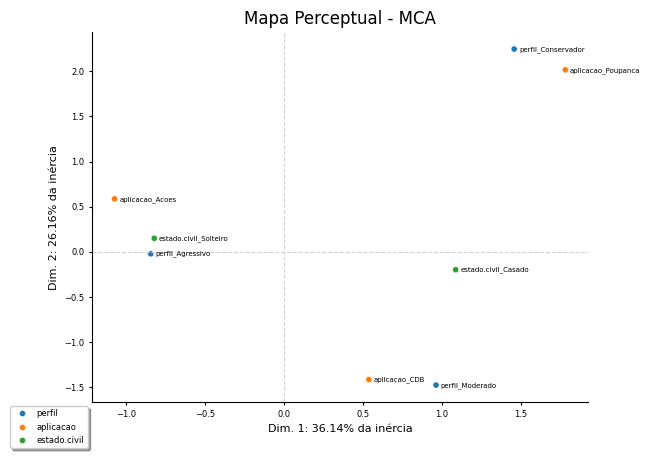

In [69]:
chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variavel': var_chart})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['categoria'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(0,0), fancybox=True, shadow=True, fontsize = '6')
plt.title("Mapa Perceptual - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()